In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import pytesseract
import os

In [2]:
img=cv2.imread("C:/Users/Ben Romdhane/Documents/Project/test_v2/test/TEST_0011.jpg")
img=cv2.resize(img,None,fx=4,fy=4)

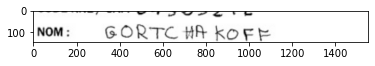

In [3]:
plt.figure()
plt.imshow(img)

In [4]:
pytesseract.pytesseract.tesseract_cmd = r"..\tesseract.exe"

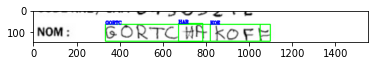

In [5]:
boxes= pytesseract.image_to_data(img, lang="eng")
#print(boxes)
for x,b in enumerate(boxes.splitlines()):
    if x !=0:
        b=b.split()
        #print(b)
        if len(b)==12:
            x,y,w,h=int(b[6]),int(b[7]),int(b[8]),int(b[9])
            cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
            cv2.putText(img,b[11],(x,y),cv2.FONT_HERSHEY_COMPLEX,0.7,(0,0,255),3)
            
plt.imshow(img)



In [3]:
import pandas as pd 
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [4]:
english_sentences = pd.read_csv(".\en_fr\small_vocab_en.csv", header=None, names=['Line 1','Line 2'])
french_sentences = pd.read_csv(".\en_fr\small_vocab_fr.csv", header=None, names=['Line 1','Line 2'])

In [97]:
english_sentences

,Line 1,Line 2
0,new jersey is sometimes quiet during autumn,and it is snowy in april .
1,the united states is usually chilly during july,and it is usually freezing in november .
2,california is usually quiet during march,and it is usually hot in june .
3,the united states is sometimes mild during june,and it is cold in september .
4,your least liked fruit is the grape,but my least liked is the apple .
...,...,...
137855,france is never busy during march,and it is sometimes pleasant in september .
137856,india is sometimes beautiful during spring,and it is snowy in june .
137857,india is never wet during summer,but it is sometimes chilly in winter .
137858,france is never chilly during january,but it is never mild in october .


In [6]:
french_sentences

,Line 1,Line 2
0,new jersey est parfois calme pendant l' automne,et il est neigeux en avril .
1,les états-unis est généralement froid en juillet,et il gèle habituellement en novembre .
2,california est généralement calme en mars,et il est généralement chaud en juin .
3,les états-unis est parfois légère en juin,et il fait froid en septembre .
4,votre moins aimé fruit est le raisin,mais mon moins aimé est la pomme .
...,...,...
137855,la france est jamais occupée en mars,et il est parfois agréable en septembre .
137856,l' inde est parfois belle au printemps,et il est neigeux en juin .
137857,l' inde est jamais mouillé pendant l' été,mais il est parfois froid en hiver .
137858,la france est jamais froid en janvier,mais il est jamais doux en octobre .


In [7]:
english_sentences.shape, french_sentences.shape

((137860, 2), (137860, 2))

In [8]:
print(english_sentences["Line 1"][50])
print(french_sentences["Line 1"][50])

paris is never hot during summer 
paris est jamais chaude pendant l' été 


In [9]:
def find_Null_item(df):
    rows_with_null = []
    for index, row in df.iterrows():
        is_nan_series = row.isnull()
        if is_nan_series.any():
            rows_with_null.append(index)
    return rows_with_null

In [10]:
en_null = find_Null_item(english_sentences)
fr_null = find_Null_item(french_sentences)

In [11]:
def Union(lst1, lst2): 
    union_list = list(set(lst1) | set(lst2)) 
    return union_list

In [12]:
null_list = Union(en_null, fr_null)
len(null_list)

16806

In [13]:
english_sentences = english_sentences.drop(null_list)
french_sentences = french_sentences.drop(null_list)

In [14]:
english_sentences.shape, french_sentences.shape

((121054, 2), (121054, 2))

In [15]:
english_list = np.array(english_sentences["Line 1"] + english_sentences["Line 2"])
french_list = np.array(french_sentences["Line 1"] + french_sentences["Line 2"])

In [16]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence

In [17]:
max_words= 100
en_tok= Tokenizer(num_words=max_words)
en_tok.fit_on_texts(english_list)
en_sequences=en_tok.texts_to_sequences(english_list)


In [18]:
len(en_sequences)

121054

In [19]:
fr_tok= Tokenizer(num_words=max_words)
fr_tok.fit_on_texts(french_list)
fr_sequences=fr_tok.texts_to_sequences(french_list)


In [20]:
len(fr_sequences)

121054

In [21]:
max_len_fr = max([len(sentence) for sentence in fr_sequences])
max_len_fr

21

In [22]:
max_len_en = max([len(sentence) for sentence in en_sequences])
max_len_en

15

In [23]:
french_vocab_size = len(fr_tok.word_index)
print("len french_word_index: ", french_vocab_size, "\n")
print("french_word_index: \n", fr_tok.word_index)

len french_word_index:  168 

french_word_index: 
 {'est': 1, 'en': 2, 'il': 3, 'mais': 4, 'les': 5, 'et': 6, 'la': 7, 'parfois': 8, 'jamais': 9, 'le': 10, "l'": 11, 'généralement': 12, 'moins': 13, 'au': 14, 'aimé': 15, 'fruit': 16, 'préféré': 17, 'agréable': 18, 'froid': 19, 'chaud': 20, 'son': 21, 'automne': 22, 'mois': 23, 'de': 24, 'plus': 25, 'à': 26, 'paris': 27, 'inde': 28, 'états': 29, 'unis': 30, 'pendant': 31, 'new': 32, 'jersey': 33, 'france': 34, 'chine': 35, 'citrons': 36, 'pamplemousse': 37, 'juin': 38, 'printemps': 39, 'janvier': 40, 'hiver': 41, 'mars': 42, 'mai': 43, 'juillet': 44, 'septembre': 45, 'avril': 46, 'novembre': 47, 'décembre': 48, 'février': 49, 'mon': 50, 'octobre': 51, 'été': 52, 'merveilleux': 53, 'votre': 54, 'août': 55, 'relaxant': 56, 'doux': 57, 'humide': 58, 'notre': 59, 'sec': 60, 'occupé': 61, 'leur': 62, 'californie': 63, 'pluvieux': 64, 'elle': 65, 'calme': 66, 'aime': 67, 'beau': 68, 'habituellement': 69, 'oranges': 70, 'pêches': 71, 'verts': 

In [24]:
english_vocab_size = len(en_tok.word_index)
print("len_english_vocab_size: ", english_vocab_size, "\n")
print("english_vocab_size: \n \n", en_tok.word_index)

len_english_vocab_size:  96 

english_vocab_size: 
 
 {'is': 1, 'during': 2, 'it': 3, 'in': 4, 'but': 5, 'the': 6, 'sometimes': 7, 'usually': 8, 'never': 9, 'and': 10, 'least': 11, 'fruit': 12, 'favorite': 13, 'liked': 14, 'most': 15, 'loved': 16, 'paris': 17, 'india': 18, 'united': 19, 'states': 20, 'california': 21, 'new': 22, 'jersey': 23, 'france': 24, 'china': 25, 'nice': 26, 'fall': 27, 'june': 28, 'freezing': 29, 'spring': 30, 'pleasant': 31, 'beautiful': 32, 'january': 33, 'snowy': 34, 'warm': 35, 'cold': 36, 'winter': 37, 'march': 38, 'autumn': 39, 'may': 40, 'your': 41, 'my': 42, 'his': 43, 'our': 44, 'her': 45, 'wonderful': 46, 'their': 47, 'busy': 48, 'july': 49, 'september': 50, 'april': 51, 'chilly': 52, 'dry': 53, 'november': 54, 'december': 55, 'february': 56, 'rainy': 57, 'mild': 58, 'october': 59, 'summer': 60, 'wet': 61, 'relaxing': 62, 'quiet': 63, 'hot': 64, 'august': 65, 'grapefruit': 66, 'he': 67, 'dislikes': 68, 'likes': 69, 'she': 70, 'grape': 71, 'apple': 72, 

In [25]:
#padding
en_sequences = sequence.pad_sequences(en_sequences, maxlen = max_len_en, padding = 'post')
fr_sequences = sequence.pad_sequences(fr_sequences, maxlen = max_len_fr, padding = 'post')

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(en_sequences, fr_sequences, test_size=0.33, random_state=0)

In [27]:
#Keras's sparse_categorical_crossentropy function requires the labels to be in 3 dimensions
y_train = y_train.reshape(*y_train.shape, 1)


In [28]:
from keras.models import Sequential
from keras.layers import GRU, Dense, RepeatVector, Bidirectional, TimeDistributed
from keras.layers.embeddings import Embedding
from tensorflow.keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy

In [29]:
model = Sequential()
model.add(Embedding(input_dim=english_vocab_size+1, output_dim=128, input_length=en_sequences.shape[1]))
model.add(Bidirectional(GRU(256, return_sequences=False)))
model.add(RepeatVector(y_train.shape[1]))
model.add(Bidirectional(GRU(256, return_sequences=True)))
model.add(TimeDistributed(Dense(french_vocab_size+1, activation='softmax')))

learning_rate = 0.005
    
model.compile( loss = sparse_categorical_crossentropy, 
               optimizer = Adam(learning_rate), 
               metrics = ['accuracy'])


In [31]:
history = model.fit(x_train, y_train, batch_size = 1050, epochs = 30, validation_split = 0.2)


Epoch 1/30
62/62 [==============================] - 315s 5s/step - loss: 1.8284 - accuracy: 0.5269 - val_loss: 1.5357 - val_accuracy: 0.5941
Epoch 2/30
62/62 [==============================] - 316s 5s/step - loss: 1.2689 - accuracy: 0.6481 - val_loss: 1.0399 - val_accuracy: 0.7005
Epoch 3/30
62/62 [==============================] - 317s 5s/step - loss: 0.9115 - accuracy: 0.7327 - val_loss: 0.7568 - val_accuracy: 0.7707
Epoch 4/30
62/62 [==============================] - 317s 5s/step - loss: 0.6654 - accuracy: 0.7969 - val_loss: 0.5917 - val_accuracy: 0.8165
Epoch 5/30
62/62 [==============================] - 315s 5s/step - loss: 0.4492 - accuracy: 0.8643 - val_loss: 0.3523 - val_accuracy: 0.8941
Epoch 6/30
62/62 [==============================] - 315s 5s/step - loss: 0.2996 - accuracy: 0.9112 - val_loss: 0.2677 - val_accuracy: 0.9201
Epoch 7/30
62/62 [==============================] - 317s 5s/step - loss: 0.2474 - accuracy: 0.9260 - val_loss: 0.2329 - val_accuracy: 0.9296
Epoch 8/30
62

In [43]:
history1 = model.fit(x_train, y_train, batch_size = 3000, epochs = 2, validation_split = 0.2)


Epoch 1/2
22/22 [==============================] - 320s 15s/step - loss: 0.0262 - accuracy: 0.9901 - val_loss: 0.1046 - val_accuracy: 0.9753
Epoch 2/2
22/22 [==============================] - 317s 14s/step - loss: 0.0261 - accuracy: 0.9901 - val_loss: 0.1052 - val_accuracy: 0.9753


In [44]:
accuracy = model.evaluate(x_test, y_test)

1249/1249 [==============================] - 124s 100ms/step - loss: 0.1069 - accuracy: 0.9753


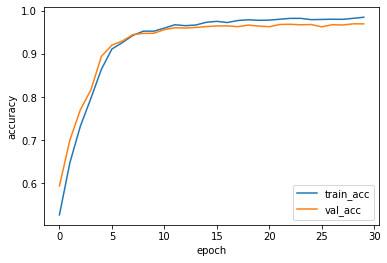

In [45]:
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_acc', 'val_acc'])
plt.show()

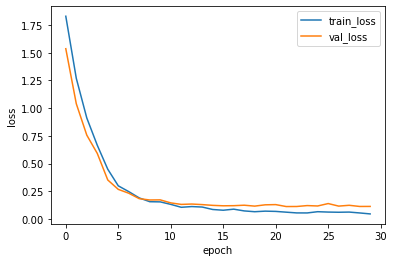

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss', 'val_loss'])
plt.show()

In [104]:
y_id_to_word = {value: key for key, value in fr_tok.word_index.items()}
y_id_to_word[0] = ' '
sentence = 'he dislikes strawberry'
sentence2 = 'new jersey is never snowy during may ' #english_sentences['Line 1'][9500]
sentence = [en_tok.word_index[word] for word in sentence.split()]
sentence = pad_sequences([sentence], maxlen=en_sequences.shape[-1], padding='post')
sentences = np.array([sentence[0], en_sequences[9500]])

predictions = model.predict(sentences, len(sentences))


In [110]:
print('example 1:')
print(' '.join([y_id_to_word[np.argmax(x)] for x in predictions[0]]))
print()

print('example 2:')
print("english sentence: ", english_sentences['Line 1'][9500])
print("test: ", ' '.join([y_id_to_word[np.max(x)] for x in fr_sequences[9500]]))
print("prediction: ", ' '.join([y_id_to_word[np.argmax(x)] for x in predictions[1]]))


example 1:
il déteste les les les citrons et les bananes                        

example 2:
english sentence:  new jersey is never snowy during may 
test:  la pêche est moins son fruit préféré mais la chaux est notre moins préféré              
prediction:  la pêche est moins son fruit préféré mais la chaux est notre moins préféré              
